This Notebook will help computing the Implied Volatility though the Newton Raphson method and using the Black-Scholes and the Greek Vega formulas.

$$x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}$$

In [47]:
import numpy as np
import scipy.stats as si
import matplotlib.pyplot as plt

In [8]:
def Vega(S, K, T, r, sigma):
    '''
    S: spot price
    K: strike price
    T: time to maturity
    r: interest rate
    sigma: volatility of underlying asset
    '''
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    vega = S * si.norm.cdf(d1, 0.0, 1.0) * np.sqrt(T)
    
    return vega

In [24]:
def BlackScholes_Call(S, K, T, r, sigma):
    '''
    S: spot price
    K: strike price
    T: time to maturity
    r: interest rate
    sigma: volatility of underlying asset
    '''
    
    d1 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    call =  S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    
    return call

In [23]:
def BlackScholes_Put(S, K, T, r, sigma):
    '''
    S: spot price
    K: strike price
    T: time to maturity
    r: interest rate
    sigma: volatility of underlying asset
    '''
    
    d1 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    put = K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - S * si.norm.cdf(-d1, 0.0, 1.0)
    
    return put

In [26]:
BlackScholes_Call(100, 50, 1, 0.05, 0.25)

52.32302816115622

In [25]:
BlackScholes_Put(50, 100, 1, 0.05, 0.25)

44.96536485401607

In [53]:
def Newton_Raphson(f, f_prime, S, K, T, r, sigma, tolerance):
    '''
    f: the function
    f_prime: the first derivative of the function
    S: spot price
    K: strike price
    T: time to maturity
    r: interest rate
    sigma: volatility of underlying asset
    tolerance: max error
    '''
    x_list = []
    x_0 = sigma
    x_new = x_0
    x_old = 1
    
    c = 0
    
    while abs(x_new - x_old) > tolerance:
        x_old = x_new
        f_x = f(S, K, T, r, x_old)
        f_prime_x = f_prime(S, K, T, r, x_old)
        print("Iteration {:4d} - Implied Volatility = {}".format(c,x_new))
        c+=1
        x_new = x_old - (f_x / f_prime_x)
        x_list.append(x_new)
        
    return x_list

In [54]:
VolEvol = Newton_Raphson(BlackScholes_Call, Vega, 50, 100, 1, 0.05, 0.25, 0.0001)

Iteration    0 - Implied Volatility = 0.25
Iteration    1 - Implied Volatility = 0.6882764392337593
Iteration    2 - Implied Volatility = 1.0151954536973296
Iteration    3 - Implied Volatility = 1.269768159637938
Iteration    4 - Implied Volatility = 1.4775078683138028
Iteration    5 - Implied Volatility = 1.6526686852235524
Iteration    6 - Implied Volatility = 1.803871632535645
Iteration    7 - Implied Volatility = 1.9367156993722496
Iteration    8 - Implied Volatility = 2.0550433732592746
Iteration    9 - Implied Volatility = 2.1616072035951563
Iteration   10 - Implied Volatility = 2.258447253276085
Iteration   11 - Implied Volatility = 2.3471178779452333
Iteration   12 - Implied Volatility = 2.42883074162869
Iteration   13 - Implied Volatility = 2.5045486975884192
Iteration   14 - Implied Volatility = 2.5750495239818476
Iteration   15 - Implied Volatility = 2.640970449468815
Iteration   16 - Implied Volatility = 2.7028400334758422
Iteration   17 - Implied Volatility = 2.76110148576

Iteration  396 - Implied Volatility = 5.509922468271763
Iteration  397 - Implied Volatility = 5.51177249179241
Iteration  398 - Implied Volatility = 5.513617314609076
Iteration  399 - Implied Volatility = 5.5154569644738105
Iteration  400 - Implied Volatility = 5.517291468921451
Iteration  401 - Implied Volatility = 5.519120855271859
Iteration  402 - Implied Volatility = 5.5209451506321265
Iteration  403 - Implied Volatility = 5.522764381898759
Iteration  404 - Implied Volatility = 5.524578575759826
Iteration  405 - Implied Volatility = 5.5263877586970835
Iteration  406 - Implied Volatility = 5.528191956988077
Iteration  407 - Implied Volatility = 5.52999119670821
Iteration  408 - Implied Volatility = 5.53178550373279
Iteration  409 - Implied Volatility = 5.53357490373905
Iteration  410 - Implied Volatility = 5.535359422208141
Iteration  411 - Implied Volatility = 5.537139084427105
Iteration  412 - Implied Volatility = 5.5389139154908165
Iteration  413 - Implied Volatility = 5.54068394

Iteration  789 - Implied Volatility = 5.996142010733527
Iteration  790 - Implied Volatility = 5.997001295756331
Iteration  791 - Implied Volatility = 5.997859375590209
Iteration  792 - Implied Volatility = 5.998716253465701
Iteration  793 - Implied Volatility = 5.999571932600598
Iteration  794 - Implied Volatility = 6.0004264162000105
Iteration  795 - Implied Volatility = 6.001279707456434
Iteration  796 - Implied Volatility = 6.002131809549813
Iteration  797 - Implied Volatility = 6.00298272564761
Iteration  798 - Implied Volatility = 6.0038324589048635
Iteration  799 - Implied Volatility = 6.00468101246426
Iteration  800 - Implied Volatility = 6.005528389456191
Iteration  801 - Implied Volatility = 6.006374592998821
Iteration  802 - Implied Volatility = 6.007219626198149
Iteration  803 - Implied Volatility = 6.008063492148072
Iteration  804 - Implied Volatility = 6.008906193930442
Iteration  805 - Implied Volatility = 6.009747734615138
Iteration  806 - Implied Volatility = 6.01058811

Iteration 1243 - Implied Volatility = 6.297158835341775
Iteration 1244 - Implied Volatility = 6.297678875945536
Iteration 1245 - Implied Volatility = 6.298198456044245
Iteration 1246 - Implied Volatility = 6.298717576420094
Iteration 1247 - Implied Volatility = 6.299236237853313
Iteration 1248 - Implied Volatility = 6.2997544411221815
Iteration 1249 - Implied Volatility = 6.300272187003033
Iteration 1250 - Implied Volatility = 6.3007894762702605
Iteration 1251 - Implied Volatility = 6.301306309696322
Iteration 1252 - Implied Volatility = 6.301822688051749
Iteration 1253 - Implied Volatility = 6.302338612105154
Iteration 1254 - Implied Volatility = 6.302854082623231
Iteration 1255 - Implied Volatility = 6.3033691003707695
Iteration 1256 - Implied Volatility = 6.3038836661106545
Iteration 1257 - Implied Volatility = 6.3043977806038765
Iteration 1258 - Implied Volatility = 6.3049114446095365
Iteration 1259 - Implied Volatility = 6.305424658884851
Iteration 1260 - Implied Volatility = 6.30

Iteration 1721 - Implied Volatility = 6.504177468866216
Iteration 1722 - Implied Volatility = 6.504541131975283
Iteration 1723 - Implied Volatility = 6.504904563437804
Iteration 1724 - Implied Volatility = 6.505267763537453
Iteration 1725 - Implied Volatility = 6.5056307325573925
Iteration 1726 - Implied Volatility = 6.505993470780273
Iteration 1727 - Implied Volatility = 6.506355978488233
Iteration 1728 - Implied Volatility = 6.5067182559629035
Iteration 1729 - Implied Volatility = 6.507080303485407
Iteration 1730 - Implied Volatility = 6.507442121336358
Iteration 1731 - Implied Volatility = 6.507803709795868
Iteration 1732 - Implied Volatility = 6.508165069143542
Iteration 1733 - Implied Volatility = 6.5085261996584824
Iteration 1734 - Implied Volatility = 6.5088871016192895
Iteration 1735 - Implied Volatility = 6.509247775304063
Iteration 1736 - Implied Volatility = 6.509608220990403
Iteration 1737 - Implied Volatility = 6.50996843895541
Iteration 1738 - Implied Volatility = 6.51032

Iteration 2196 - Implied Volatility = 6.654996965358826
Iteration 2197 - Implied Volatility = 6.655275432502767
Iteration 2198 - Implied Volatility = 6.655553761058577
Iteration 2199 - Implied Volatility = 6.655831951159063
Iteration 2200 - Implied Volatility = 6.656110002936841
Iteration 2201 - Implied Volatility = 6.656387916524343
Iteration 2202 - Implied Volatility = 6.656665692053812
Iteration 2203 - Implied Volatility = 6.656943329657302
Iteration 2204 - Implied Volatility = 6.657220829466685
Iteration 2205 - Implied Volatility = 6.657498191613643
Iteration 2206 - Implied Volatility = 6.657775416229673
Iteration 2207 - Implied Volatility = 6.658052503446087
Iteration 2208 - Implied Volatility = 6.658329453394011
Iteration 2209 - Implied Volatility = 6.658606266204387
Iteration 2210 - Implied Volatility = 6.658882942007971
Iteration 2211 - Implied Volatility = 6.659159480935337
Iteration 2212 - Implied Volatility = 6.659435883116871
Iteration 2213 - Implied Volatility = 6.65971214

Iteration 2631 - Implied Volatility = 6.764619139604416
Iteration 2632 - Implied Volatility = 6.764847726566768
Iteration 2633 - Implied Volatility = 6.765076218786596
Iteration 2634 - Implied Volatility = 6.765304616339589
Iteration 2635 - Implied Volatility = 6.765532919301349
Iteration 2636 - Implied Volatility = 6.765761127747389
Iteration 2637 - Implied Volatility = 6.7659892417531315
Iteration 2638 - Implied Volatility = 6.76621726139391
Iteration 2639 - Implied Volatility = 6.766445186744971
Iteration 2640 - Implied Volatility = 6.76667301788147
Iteration 2641 - Implied Volatility = 6.766900754878475
Iteration 2642 - Implied Volatility = 6.767128397810966
Iteration 2643 - Implied Volatility = 6.767355946753835
Iteration 2644 - Implied Volatility = 6.7675834017818834
Iteration 2645 - Implied Volatility = 6.767810762969828
Iteration 2646 - Implied Volatility = 6.768038030392294
Iteration 2647 - Implied Volatility = 6.768265204123822
Iteration 2648 - Implied Volatility = 6.76849228

Iteration 3100 - Implied Volatility = 6.862566462138331
Iteration 3101 - Implied Volatility = 6.862757629806435
Iteration 3102 - Implied Volatility = 6.862948730362529
Iteration 3103 - Implied Volatility = 6.863139763852069
Iteration 3104 - Implied Volatility = 6.863330730320467
Iteration 3105 - Implied Volatility = 6.863521629813086
Iteration 3106 - Implied Volatility = 6.863712462375246
Iteration 3107 - Implied Volatility = 6.863903228052222
Iteration 3108 - Implied Volatility = 6.864093926889242
Iteration 3109 - Implied Volatility = 6.86428455893149
Iteration 3110 - Implied Volatility = 6.8644751242241036
Iteration 3111 - Implied Volatility = 6.864665622812177
Iteration 3112 - Implied Volatility = 6.864856054740758
Iteration 3113 - Implied Volatility = 6.865046420054851
Iteration 3114 - Implied Volatility = 6.865236718799412
Iteration 3115 - Implied Volatility = 6.865426951019357
Iteration 3116 - Implied Volatility = 6.8656171167595526
Iteration 3117 - Implied Volatility = 6.8658072

Iteration 3581 - Implied Volatility = 6.947519464169565
Iteration 3582 - Implied Volatility = 6.947682873961831
Iteration 3583 - Implied Volatility = 6.947846234177982
Iteration 3584 - Implied Volatility = 6.948009544847058
Iteration 3585 - Implied Volatility = 6.948172805998075
Iteration 3586 - Implied Volatility = 6.948336017660023
Iteration 3587 - Implied Volatility = 6.948499179861868
Iteration 3588 - Implied Volatility = 6.948662292632548
Iteration 3589 - Implied Volatility = 6.94882535600098
Iteration 3590 - Implied Volatility = 6.948988369996054
Iteration 3591 - Implied Volatility = 6.9491513346466345
Iteration 3592 - Implied Volatility = 6.949314249981562
Iteration 3593 - Implied Volatility = 6.949477116029651
Iteration 3594 - Implied Volatility = 6.949639932819692
Iteration 3595 - Implied Volatility = 6.949802700380451
Iteration 3596 - Implied Volatility = 6.949965418740667
Iteration 3597 - Implied Volatility = 6.950128087929057
Iteration 3598 - Implied Volatility = 6.95029070

Iteration 4076 - Implied Volatility = 7.022873455235227
Iteration 4077 - Implied Volatility = 7.023015432385899
Iteration 4078 - Implied Volatility = 7.023157371751244
Iteration 4079 - Implied Volatility = 7.023299273350694
Iteration 4080 - Implied Volatility = 7.023441137203661
Iteration 4081 - Implied Volatility = 7.023582963329545
Iteration 4082 - Implied Volatility = 7.023724751747731
Iteration 4083 - Implied Volatility = 7.023866502477589
Iteration 4084 - Implied Volatility = 7.024008215538475
Iteration 4085 - Implied Volatility = 7.0241498909497295
Iteration 4086 - Implied Volatility = 7.024291528730679
Iteration 4087 - Implied Volatility = 7.024433128900633
Iteration 4088 - Implied Volatility = 7.024574691478891
Iteration 4089 - Implied Volatility = 7.024716216484734
Iteration 4090 - Implied Volatility = 7.024857703937428
Iteration 4091 - Implied Volatility = 7.024999153856227
Iteration 4092 - Implied Volatility = 7.025140566260369
Iteration 4093 - Implied Volatility = 7.0252819

Iteration 4559 - Implied Volatility = 7.087382499476845
Iteration 4560 - Implied Volatility = 7.087508241769025
Iteration 4561 - Implied Volatility = 7.087633954180551
Iteration 4562 - Implied Volatility = 7.087759636725149
Iteration 4563 - Implied Volatility = 7.087885289416537
Iteration 4564 - Implied Volatility = 7.088010912268422
Iteration 4565 - Implied Volatility = 7.088136505294504
Iteration 4566 - Implied Volatility = 7.08826206850847
Iteration 4567 - Implied Volatility = 7.088387601924003
Iteration 4568 - Implied Volatility = 7.088513105554773
Iteration 4569 - Implied Volatility = 7.08863857941444
Iteration 4570 - Implied Volatility = 7.088764023516658
Iteration 4571 - Implied Volatility = 7.0888894378750695
Iteration 4572 - Implied Volatility = 7.089014822503308
Iteration 4573 - Implied Volatility = 7.089140177414998
Iteration 4574 - Implied Volatility = 7.089265502623755
Iteration 4575 - Implied Volatility = 7.089390798143185
Iteration 4576 - Implied Volatility = 7.089516063

Iteration 5051 - Implied Volatility = 7.145888648914254
Iteration 5052 - Implied Volatility = 7.146001182032843
Iteration 5053 - Implied Volatility = 7.146113691042552
Iteration 5054 - Implied Volatility = 7.1462261759533705
Iteration 5055 - Implied Volatility = 7.146338636775282
Iteration 5056 - Implied Volatility = 7.146451073518265
Iteration 5057 - Implied Volatility = 7.1465634861922895
Iteration 5058 - Implied Volatility = 7.146675874807322
Iteration 5059 - Implied Volatility = 7.146788239373321
Iteration 5060 - Implied Volatility = 7.146900579900239
Iteration 5061 - Implied Volatility = 7.147012896398024
Iteration 5062 - Implied Volatility = 7.147125188876617
Iteration 5063 - Implied Volatility = 7.147237457345953
Iteration 5064 - Implied Volatility = 7.147349701815958
Iteration 5065 - Implied Volatility = 7.147461922296558
Iteration 5066 - Implied Volatility = 7.147574118797668
Iteration 5067 - Implied Volatility = 7.147686291329198
Iteration 5068 - Implied Volatility = 7.147798

Iteration 5509 - Implied Volatility = 7.195054330411509
Iteration 5510 - Implied Volatility = 7.195156777878343
Iteration 5511 - Implied Volatility = 7.195259205241192
Iteration 5512 - Implied Volatility = 7.195361612507689
Iteration 5513 - Implied Volatility = 7.1954639996854635
Iteration 5514 - Implied Volatility = 7.19556636678214
Iteration 5515 - Implied Volatility = 7.195668713805339
Iteration 5516 - Implied Volatility = 7.1957710407626765
Iteration 5517 - Implied Volatility = 7.195873347661765
Iteration 5518 - Implied Volatility = 7.195975634510212
Iteration 5519 - Implied Volatility = 7.196077901315622
Iteration 5520 - Implied Volatility = 7.196180148085593
Iteration 5521 - Implied Volatility = 7.19628237482772
Iteration 5522 - Implied Volatility = 7.1963845815495935
Iteration 5523 - Implied Volatility = 7.196486768258801
Iteration 5524 - Implied Volatility = 7.196588934962923
Iteration 5525 - Implied Volatility = 7.196691081669539
Iteration 5526 - Implied Volatility = 7.1967932

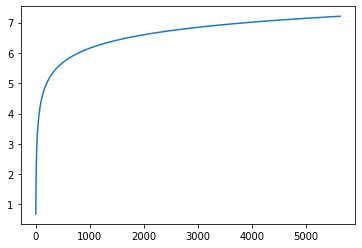

In [55]:
plt.plot(VolEvol)